In [1]:
# import the libraries as shown below
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
# Define image size and batch size
img_size = (224, 224)
batch_size = 32

In [3]:
# Data Preprocessing
# Training Image Processing

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    'train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 11983 images belonging to 17 classes.


In [4]:
# Test Image Processing 

test_datagen = ImageDataGenerator(rescale=1./255)

test_set =test_datagen.flow_from_directory('valid',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 3986 images belonging to 17 classes.


In [5]:
# Load pre-trained VGG16 model
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

In [6]:
# Freeze pre-trained layers
for layer in vgg.layers:
    layer.trainable = False

In [7]:
# Add new trainable layers
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dense(17, activation='softmax')(x)

In [8]:
# Create custom model
model = Model(inputs=vgg.input, outputs=x)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
# Compile model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [11]:
# fit the model
r = model.fit(
  training_set,
  epochs=5,
  validation_data=test_set
)

Epoch 1/5
375/375 [==============================] - 1533s 4s/step - loss: 1.1318 - accuracy: 0.6582 - val_loss: 0.8875 - val_accuracy: 0.7245
Epoch 2/5
375/375 [==============================] - 1658s 4s/step - loss: 0.6059 - accuracy: 0.8116 - val_loss: 0.8163 - val_accuracy: 0.7554
Epoch 3/5
375/375 [==============================] - 1610s 4s/step - loss: 0.4702 - accuracy: 0.8474 - val_loss: 0.9141 - val_accuracy: 0.7285
Epoch 4/5
375/375 [==============================] - 1599s 4s/step - loss: 0.3850 - accuracy: 0.8737 - val_loss: 0.7381 - val_accuracy: 0.7830
Epoch 5/5
375/375 [==============================] - 1598s 4s/step - loss: 0.3115 - accuracy: 0.8990 - val_loss: 0.7108 - val_accuracy: 0.7925


In [12]:
model.save_weights("vgg16.hdf5")

model.save('vgg16.h5')

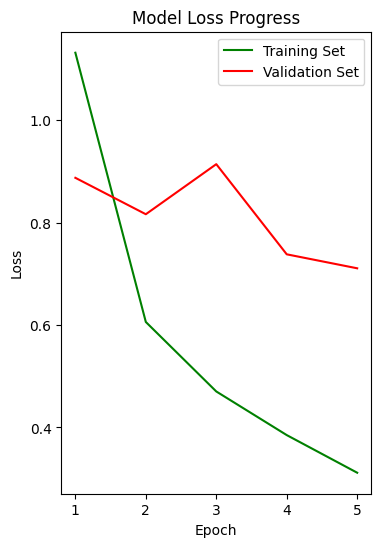

In [26]:
# plot the loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,6))
plt.plot(range(1, len(r.history['loss'])+1), r.history['loss'], color='green')
plt.plot(range(1, len(r.history['val_loss'])+1), r.history['val_loss'], color='red')
plt.title('Model Loss Progress')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
plt.savefig('loss.png', dpi=350, bbox_inches='tight')
plt.show()


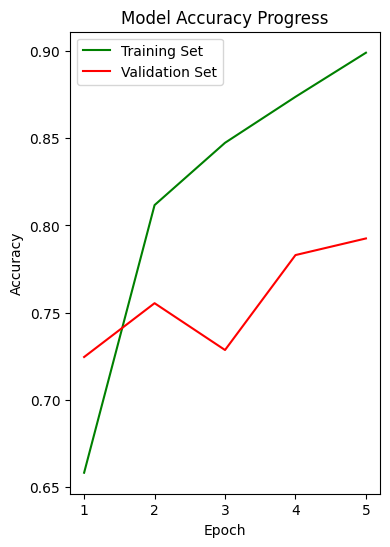

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,6))
plt.plot(range(1, len(r.history['accuracy'])+1), r.history['accuracy'], color='green')
plt.plot(range(1, len(r.history['val_accuracy'])+1), r.history['val_accuracy'], color='red')
plt.title('Model Accuracy Progress')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper left')
plt.savefig('accuracy.png', dpi=350, bbox_inches='tight')
plt.show()


In [30]:
# Load the necessary libraries
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import confusion_matrix

# Set the path to the test data directory
test_data_dir = 'valid'

# Load the pre-trained VGG16 model
model = load_model('vgg16.h5')

# Set up the image data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Make predictions on the test data
predictions = model.predict(test_generator)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print the confusion matrix
print(cm)


Found 3986 images belonging to 17 classes.
125/125 [==============================] - 376s 3s/step
[[ 49   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0 126  22   0   2   0   8   1   4   0   5   1   9   1   0   2   3]
 [  0   7 151   0   4   4   1   3   5   4   2  16  10   5   0   0   6]
 [  0   1   1 219   2   0   0   1  22   2   0   0   0   0   1   1   0]
 [  0   3   1   2 153   3   5   2  52   0   8   0   3   4   1   7   0]
 [  0   2   8   0  11 187   3   2  11   4   1   1   3   4   0  14   4]
 [  0   2   9   0  17   0 140   4   1   6   3   5  11  25   0   5   3]
 [  0   6   5   2  18   3   5 170  10   0   8   1   4   1   0   7   5]
 [  0   1   1  13   8   4   0   1 230   1   1   0   0   0   0   0   2]
 [  1   0  11   1   4   3   4   2   5 200   0   3   4   3   0   2   0]
 [  0   0   1   0   5   3   1   5   8   3 235   0   0   0   0   0   2]
 [  0   0  25   0   0   0   1   0   0   3   0 227   1   1   0   4   2]
 [  0   9   7   0   1   5   5   2   3   3   1   6

In [33]:
# Save the confusion matrix to a file
np.savetxt('confusion_matrix.txt', cm, fmt='%d')

In [31]:
# Load the necessary libraries
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import classification_report

# Set the path to the test data directory
test_data_dir = 'valid'

# Load the pre-trained VGG16 model
model = load_model('vgg16.h5')

# Set up the image data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Make predictions on the test data
predictions = model.predict(test_generator)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes
true_classes = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

# Print the classification report
print(report)


Found 3986 images belonging to 17 classes.
125/125 [==============================] - 307s 2s/step
                  precision    recall  f1-score   support

       aloe_vera       0.98      0.98      0.98        50
         astilbe       0.79      0.68      0.73       184
      bellflower       0.60      0.69      0.64       218
black_eyed_susan       0.90      0.88      0.89       250
       calendula       0.62      0.63      0.63       244
california_poppy       0.85      0.73      0.79       255
       carnation       0.77      0.61      0.68       231
    common_daisy       0.85      0.69      0.77       245
       coreopsis       0.60      0.88      0.71       262
        daffodil       0.85      0.82      0.84       243
       dandelion       0.88      0.89      0.89       263
            iris       0.84      0.86      0.85       264
        magnolia       0.79      0.74      0.76       262
            rose       0.78      0.92      0.85       250
       sunflower       0.99   

In [32]:
# Save the classification report to a file
with open('classification_report.txt', 'w') as f:
    f.write(report)

In [34]:
training_set.class_indices

{'aloe_vera': 0,
 'astilbe': 1,
 'bellflower': 2,
 'black_eyed_susan': 3,
 'calendula': 4,
 'california_poppy': 5,
 'carnation': 6,
 'common_daisy': 7,
 'coreopsis': 8,
 'daffodil': 9,
 'dandelion': 10,
 'iris': 11,
 'magnolia': 12,
 'rose': 13,
 'sunflower': 14,
 'tulip': 15,
 'water_lily': 16}

In [42]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('valid/rose/43042677621_d339ce15f8_c.jpg',target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
print(result)

1/1 [==============================] - 0s 122ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [43]:
if result[0][0]==1:
    print('Aloe Vera')

elif result[0][1]==1:
    print('Astible')

elif result[0][2]==1:
    print('Bellflower')

elif result[0][3]==1:
    print('Black Eyed Susan')

elif result[0][4]==1:
    print('Calendula')

elif result[0][5]==1:
    print('California Poppy')

elif result[0][6]==1:
    print('Carnation')

elif result[0][7]==1:
    print('Common Daisy')

elif result[0][8]==1:
    print('Coreopsis')

elif result[0][9]==1:
    print('Daffodil')

elif result[0][10]==1:
    print('Dandelion')

elif result[0][11]==1:
    print('Iris')

elif result[0][12]==1:
    print('Magnolia')

elif result[0][13]==1:
    print('Rose')

elif result[0][14]==1:
    print('Sunflower')

elif result[0][15]==1:
    print('Tulip')

elif result[0][16]==1:
    print('Water Lily')

Rose


In [44]:
# Conversion of Tensorflow Model to tflite model

import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('vgg16.h5')

# Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('vgg16.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmp48i1r0ea\assets


INFO:tensorflow:Assets written to: C:\Users\Dell\AppData\Local\Temp\tmp48i1r0ea\assets
